# Phase 1  Exploring the Data from Season 1 of Game of Thrones
## Question:  How does the prominance of characters in the narration change throught the series?

Examining how the csv files are organized , we see a seperation between a table of all the characters(nodes.csv) and
a table of all the relationships of those characters (edges.csv)

In the s1_edges dataframe: the 'Source' & 'Target' columns are the character nodes in the interactions and the 'Weight' column is the number of interactions in the scenes of the season

In the s1_nodes dataframe: the 'Id' is the character name and 'Label' appears to be a casual version that the character is refferenced by in the series. 

In [58]:
import pandas as pd 
import networkx as n
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import skew

# Read in the csv files for season 1, season 1 edges and season 1 nodes
s1_edges = pd.read_csv('gameofthrones/data/got-s1-edges.csv')
s1_nodes = pd.read_csv('gameofthrones/data/got-s1-nodes.csv')

# Examine the first 5 rows of edges to get an idea of the column and rows
print(s1_edges.head(5), '\n')

# Examine the first 5 rows of nodes to get a dataframe of the lists of characters in GoT

print(s1_nodes.head(5))

         Source  Target  Weight  Season
0           NED  ROBERT     192       1
1      DAENERYS   JORAH     154       1
2           JON     SAM     121       1
3  LITTLEFINGER     NED     107       1
4           NED   VARYS      96       1 

               Id     Label
0  ADDAM_MARBRAND     Addam
1           AEGON     Aegon
2           AERYS     Aerys
3  ALLISER_THORNE  Allister
4            ARYA      Arya


Since the main goal involves measuring prominance , we need to define what prominance means. Every character in the edge dataframe is assigned to a target character and a corrisponding Weight of the amount of scene interactions,so we can use that weight as the value we will use.  

The 2 ways we will use the value is by counting the number of other characters a character has interacted with , and by summing the total number of interactions per character. The former gives us an idea of how influencial a character is in the story , and the latter gives us an idea how much the narration focuses on a character.

To start we will need to split the edges dataframe into 2 dataframes and duplicate the 'Weight' column. We do this because of the bi-directional nature of an interaction. Neither the 'Source' column nor 'Target' column by themselves reflect every character interaction in the show. 

Finally we take the 2 new dataframes and concat them to create a new dataframe that we will use for all our future analysis.  To test that it was appended correctly we will filter for the first 2 rows of the original daatframe: 192 and 154 intereactions respectfully. This shows us that data frame 1 was included first with 'Ned' and 'Daenerys' indexed at 0 and 1. Then dataframe 2 shows up all the way after the length of dataframe 1 with 'Robert' and 'Jorah' indexed at 550 amd 551. 



In [68]:
#Create identical column names and set the character id as index for manipulation
s1_edges_index = s1_edges.rename(columns={'Source':'Id'}).set_index('Id')
s1_nodes_index = s1_nodes.set_index('Id')

print(s1_edges_index.head(2)) 

# Seperate the edges dataframe 'Source' & 'Target' columns into 2 dataframes, copying the 'Weight' column for both 'Source' & 'Target' characters
df_2 = s1_edges_index[['Target','Weight']].reset_index().drop(['Id'], axis=1).rename(columns={'Target':'Id'})
df_1 = s1_edges_index[['Weight']].reset_index()
# Concat the 2 dataframes together to have 1 dataframe that accounts every interaction from 'Source' & 'Target'
lis = pd.concat([df_1 , df_2], sort=False, ignore_index=True)
print(lis.loc[lis['Weight']==192] , '\n', lis.loc[lis['Weight']==154] )


          Target  Weight  Season
Id                              
NED       ROBERT     192       1
DAENERYS   JORAH     154       1
         Id  Weight
0       NED     192
550  ROBERT     192 
            Id  Weight
1    DAENERYS     154
551     JORAH     154


Now that the main dataframe is created , we can group all the characters in it by both Sum and Count. And put the results in new dataframes called df_sum and df_count. As you can see the dataframes df_sum & df_count are a list of unique characters with the corrisponding Sum or Count total. 

In [60]:
# Group the dataframe by the sum of all interactions per character
df_sum = lis.groupby(lis.Id)['Weight'].sum()
# Group the dataframe by the count of characters interacted 
df_count = lis.groupby(lis.Id)['Weight'].count()
print(df_sum.head(5) , df_count.head(5))

Id
ADDAM_MARBRAND      8
AEGON               4
AERYS              41
ALLISER_THORNE     73
ARYA              373
Name: Weight, dtype: int64 Id
ADDAM_MARBRAND     3
AEGON              2
AERYS             13
ALLISER_THORNE     8
ARYA              28
Name: Weight, dtype: int64


Now let's view the distribution of all sum and count interactions. Even without checking the numbers you can see the distributions are skewed to the right. This means the mean is greater than the median due to a couple of large values that push the mean higher. The median remains the same regardless of these outliers.

This means the season operates with a few characters getting most of the interactions and spotlight. 

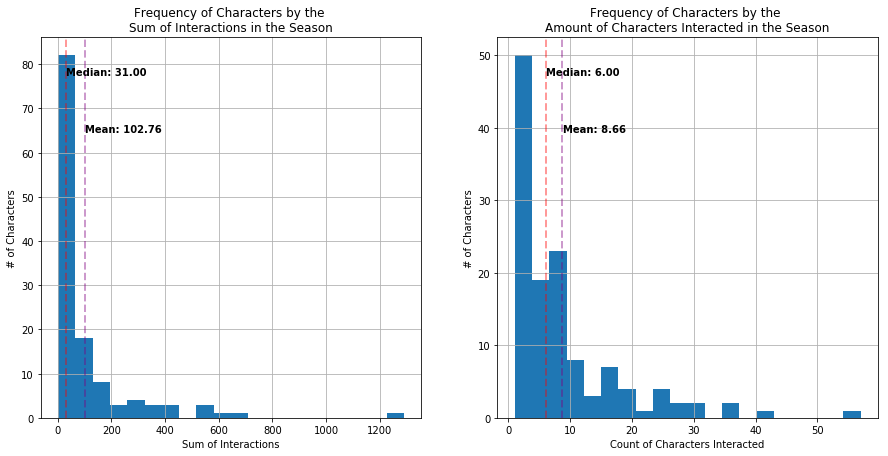

In [61]:
#Create a histograph to see the distribution of the Sum and Count dataframes

#Using the distribution to find insight about the series and the characters involved
plt.subplot(121)
plt.title('Frequency of Characters by the \nSum of Interactions in the Season')
df_sum.hist(figsize=(15, 7), bins=20) 
plt.axvline(df_sum.mean(), color='purple', linestyle='dashed', linewidth=2, alpha=.4)
plt.axvline(df_sum.median(), color='red', linestyle='dashed', linewidth=2, alpha=.4)
plt.ylabel('# of Characters')
plt.xlabel('Sum of Interactions')
_, max_ = plt.ylim()
plt.text(df_sum.mean() + df_sum.mean()*.01, max_ - max_*.25, 'Mean: {:.2f}'.format(df_sum.mean()), weight='bold')
plt.text(df_sum.median() + df_sum.median()*.01 , max_-max_*.1 ,'Median: {:.2f}'.format(df_sum.median()), weight='bold')



plt.subplot(122)
plt.title('Frequency of Characters by the \nAmount of Characters Interacted in the Season')
df_count.hist(figsize=(15, 7), bins=20)
plt.axvline(df_count.mean(), color='purple', linestyle='dashed', linewidth=2, alpha=.4)
plt.axvline(df_count.median(), color='red', linestyle='dashed', linewidth=2, alpha=.4)
plt.ylabel('# of Characters')
plt.xlabel('Count of Characters Interacted')
_, max_ = plt.ylim()
plt.text(df_count.mean() + df_count.mean()*.01, max_ - max_*.25, 'Mean: {:.2f}'.format(df_count.mean()), weight='bold')
plt.text(df_count.median() + df_count.median()*.01 , max_-max_*.1 ,'Median: {:.2f}'.format(df_count.median()), weight='bold')
plt.show()


In [62]:
# Find the list of 5 characters that have the highest number of interactions 
# Find the list of 5 characters that interacted with the greatest number of characters
print('SUM',df_sum.sort_values().tail(5),'\nCOUNT',
df_count.sort_values().tail(5))
# The skew is greater than 1 so it is highly skewed to the right
print('\tSkew\nSum: ', skew(df_sum),' Count: ', skew(df_count))

# Calculate the 95% percentile to find where the top 5% of all summed interactions start
# Then filter the dataframe using that information to list the characters involved 
print('Top 5% of total interactions were {:0.0f} interactions or higher \n'.format
      ((np.floor(df_sum.quantile(.95))+1)))

print('This top 5% involves the following characters: \n',df_sum.loc[lambda x:x>np.floor(df_sum.quantile(.95))].sort_values().reset_index())
# Calculate the 95% percentile to find where the top 5% of all counted interactions start
# Then filter the dataframe using that information to list the characters involved 
print('Top 5% of total characters interacted were {:0.0f} number of characters interacted or higher \n'.format
      ((np.floor(df_count.quantile(.95))+1)))

print('This top 5% involves the following characters: \n',df_count.loc[lambda x:x>np.floor(df_count.quantile(.95))].sort_values().reset_index())


SUM Id
JON         535
ROBERT      563
CATELYN     584
TYRION      708
NED        1290
Name: Weight, dtype: int64 
COUNT Id
ROBB       30
ROBERT     36
CATELYN    37
TYRION     41
NED        57
Name: Weight, dtype: int64
	Skew
Sum:  3.4116588193958335  Count:  2.1968309865667
Top 5% of total interactions were 438 interactions or higher 

This top 5% involves the following characters: 
          Id  Weight
0    CERSEI     444
1  DAENERYS     535
2       JON     535
3    ROBERT     563
4   CATELYN     584
5    TYRION     708
6       NED    1290
Top 5% of total characters interacted were 28 number of characters interacted or higher 

This top 5% involves the following characters: 
         Id  Weight
0     ARYA      28
1   CERSEI      29
2     ROBB      30
3   ROBERT      36
4  CATELYN      37
5   TYRION      41
6      NED      57


In [63]:
''''import pandas as pd 
import networkx as n
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import skew
# Read in the csv files for season 1, season 1 edges and season 1 nodes
s1_edges = pd.read_csv('gameofthrones/data/got-s1-edges.csv')
s1_nodes = pd.read_csv('gameofthrones/data/got-s1-nodes.csv') 

# Examine the first 5 rows of edges to get an idea of the column and rows
# The 'Source' & 'Target' columns are the character nodes in the interactions 
# and the 'Weight' column is the number of interactions in the scenes of the season
print(s1_edges.head(5), '\n')

# Examine the first 5 rows of nodes to get a dataframe of the lists of characters in GoT
# Organized by an 'Id' and 'Label'
print(s1_nodes.head(5))


#Create identical column names and set the character id as index for manipulation
s1_edges_index = s1_edges.rename(columns={'Source':'Id'}).set_index('Id')
s1_nodes_index = s1_nodes.set_index('Id')

print(s1_edges_index.head(5) , s1_nodes_index.head(5)) 
 

# Group the dataframe by the sum of all interactions per character
df_sum = s1_edges_index.groupby(s1_edges_index.index)['Weight'].sum()
# Group the dataframe by the count of characters interacted 
df_count = s1_edges_index.groupby(s1_edges_index.index)['Weight'].count()

#Create a histograph to see the distribution of the Sum and Count dataframes

#Using the distribution to find insight about the series and the characters involved
plt.subplot(121)
plt.title('Frequency of Characters by the \nSum of Interactions in the Season')
df_sum.hist(figsize=(15, 7), bins=20) 
plt.axvline(df_sum.mean(), color='purple', linestyle='dashed', linewidth=2, alpha=.4)
plt.axvline(df_sum.median(), color='red', linestyle='dashed', linewidth=2, alpha=.4)
plt.ylabel('# of Characters')
plt.xlabel('Sum of Interactions')
_, max_ = plt.ylim()
plt.text(df_sum.mean() + df_sum.mean()*.01, max_ - max_*.25, 'Mean: {:.2f}'.format(df_sum.mean()), weight='bold')
plt.text(df_sum.median() + df_sum.median()*.01 , max_-max_*.1 ,'Median: {:.2f}'.format(df_sum.median()), weight='bold')



plt.subplot(122)
plt.title('Frequency of Characters by the \nAmount of Characters Interacted in the Season')
df_count.hist(figsize=(15, 7), bins=20)
plt.axvline(df_count.mean(), color='purple', linestyle='dashed', linewidth=2, alpha=.4)
plt.axvline(df_count.median(), color='red', linestyle='dashed', linewidth=2, alpha=.4)
plt.ylabel('# of Characters')
plt.xlabel('Count of Characters Interacted')
_, max_ = plt.ylim()
plt.text(df_count.mean() + df_count.mean()*.01, max_ - max_*.25, 'Mean: {:.2f}'.format(df_count.mean()), weight='bold')
plt.text(df_count.median() + df_count.median()*.01 , max_-max_*.1 ,'Median: {:.2f}'.format(df_count.median()), weight='bold')
plt.show() 



# Find the list of 5 characters that have the highest number of interactions 
# Find the list of 5 characters that interacted with the greatest number of characters
print('SUM', s1_edges_index.groupby(s1_edges_index.index)['Weight'].sum().sort_values().tail(5),'\nCOUNT',
s1_edges_index.groupby(s1_edges_index.index)['Weight'].count().sort_values().tail(5))
# The skew is greater than 1 so it is highly skewed to the right
print('\tSkew\nSum: ', skew(df_sum),' Count: ', skew(df_count))

# Calculate the 95% percentile to find where the top 5% of all summed interactions start
# Then filter the dataframe using that information to list the characters involved 
print('Top 5% of total interactions were {:0.0f} interactions or higher \n'.format
      ((np.floor(df_sum.quantile(.95))+1)))

print('This top 5% involves the following characters: \n',df_sum.loc[lambda x:x>np.floor(df_sum.quantile(.95))].sort_values().reset_index())
# Calculate the 95% percentile to find where the top 5% of all counted interactions start
# Then filter the dataframe using that information to list the characters involved 
print('Top 5% of total characters interacted were {:0.0f} number of characters interacted or higher \n'.format
      ((np.floor(df_count.quantile(.95))+1)))

print('This top 5% involves the following characters: \n',df_count.loc[lambda x:x>np.floor(df_count.quantile(.95))].sort_values().reset_index())

#----df_sum.loc[lambda x:x>np.floor(df_sum.quantile(.95))].sort_values().reset_index().values

#Insight starts here. '''


"'import pandas as pd \nimport networkx as n\nimport matplotlib.pyplot as plt \nimport numpy as np\nfrom scipy.stats import skew\n# Read in the csv files for season 1, season 1 edges and season 1 nodes\ns1_edges = pd.read_csv('gameofthrones/data/got-s1-edges.csv')\ns1_nodes = pd.read_csv('gameofthrones/data/got-s1-nodes.csv') \n\n# Examine the first 5 rows of edges to get an idea of the column and rows\n# The 'Source' & 'Target' columns are the character nodes in the interactions \n# and the 'Weight' column is the number of interactions in the scenes of the season\nprint(s1_edges.head(5), '\n')\n\n# Examine the first 5 rows of nodes to get a dataframe of the lists of characters in GoT\n# Organized by an 'Id' and 'Label'\nprint(s1_nodes.head(5))\n\n\n#Create identical column names and set the character id as index for manipulation\ns1_edges_index = s1_edges.rename(columns={'Source':'Id'}).set_index('Id')\ns1_nodes_index = s1_nodes.set_index('Id')\n\nprint(s1_edges_index.head(5) , s1_nod